<a href="https://colab.research.google.com/github/Tanmay-Mirgal/deep-learning-model/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/MyDrive/Colab Notebooks/tensorflow/"


'dog-breed-identification (1).zip'   sample_submission.csv   test
 labels.csv			     tensorflow.ipynb	     train


In [3]:
##!unzip "/content/drive/MyDrive/Colab Notebooks/tensorflow/dog-breed-identification (1).zip" -d "drive/MyDrive/Colab Notebooks/tensorflow"

In [4]:
import tensorflow as tf


In [5]:
print(tf.__version__)

2.18.0


In [8]:
import pandas as pd
labels_csv  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tensorflow/labels.csv')
# print(labels_csv.head())
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126


In [11]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [13]:
# how many images are there for each dog bread ?
labels_csv['breed'].value_counts()

,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
...,...
golden_retriever,67
komondor,67
brabancon_griffon,67


<Axes: xlabel='breed'>

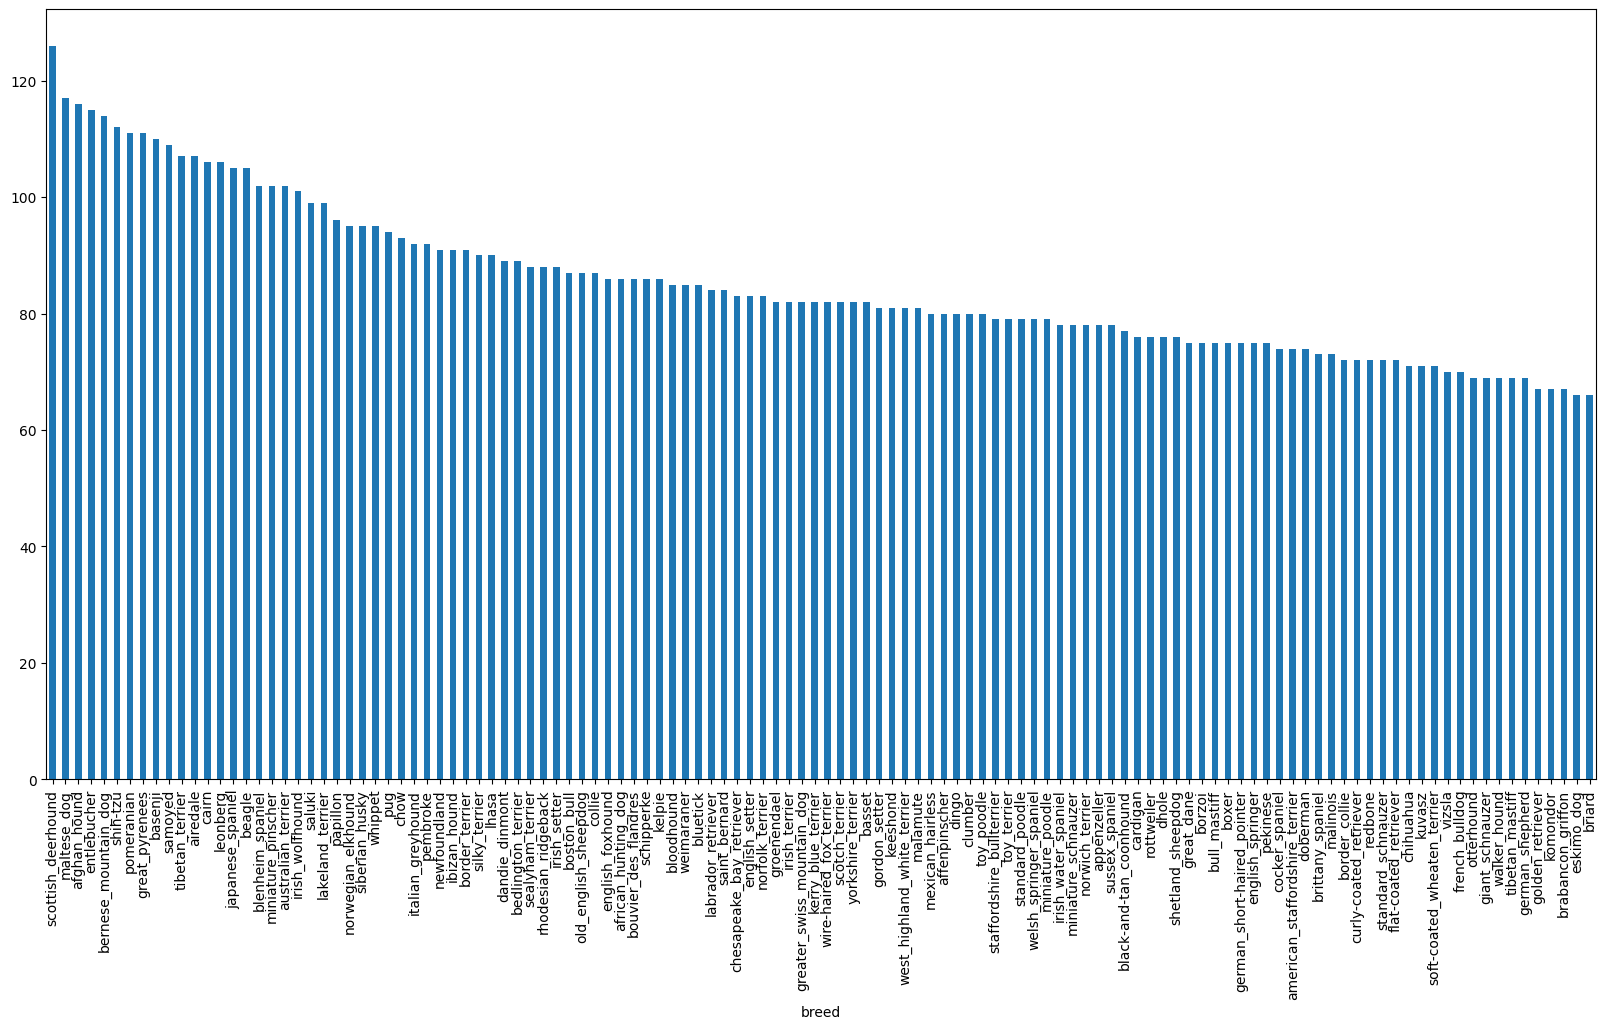

In [18]:
labels_csv['breed'].value_counts().plot(kind='bar',figsize=(20,10))

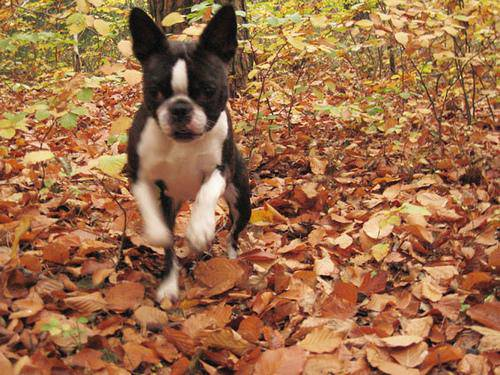

In [22]:
# lets view the image
from IPython.display import Image
Image('/content/drive/MyDrive/Colab Notebooks/tensorflow/train/000bec180eb18c7604dcecc8fe0dba07.jpg')


In [24]:
filename = ["/content/drive/MyDrive/Colab Notebooks/tensorflow/train/"+fname +".jpg" for fname in labels_csv['id'] ]
filename[:10]

['/content/drive/MyDrive/Colab Notebooks/tensorflow/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Colab Notebooks/tensorflow/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Colab Notebooks/tensorflow/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Colab Notebooks/tensorflow/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/tensorflow/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Colab Notebooks/tensorflow/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/tensorflow/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Colab Notebooks/tensorflow/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/tensorflow/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Colab Notebooks/tensorflow/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [25]:
import os
if(len(os.listdir("/content/drive/MyDrive/Colab Notebooks/tensorflow/train/")) == len(labels_csv)):
  print('Matched!!')
else:
  print('Not Matched!!')

Matched!!


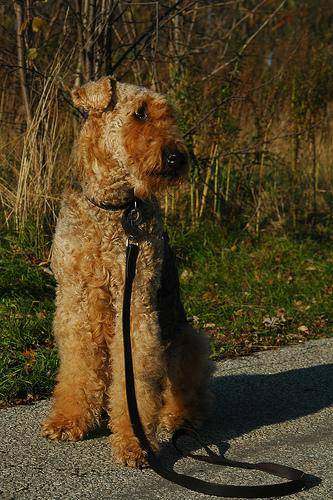

In [28]:
Image(filename[5000])

In [31]:
labels_csv['breed'][5000]

'airedale'

In [36]:
import numpy as np
labels = labels_csv['breed'].to_numpy()
# labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [37]:
len(labels)

10222

In [38]:
if len(labels) == len(filename):
  print('Matched')
else:
  print('Not Matched')

Matched


In [39]:
# find the unique values/labels
unique_labels = np.unique(labels)
unique_labels

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [40]:
len(unique_labels)

120

In [41]:
# turn single label into array of booleans
print(labels[0])
labels[0] == unique_labels

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [43]:
# turn every label into a boolean array
boolean_labels = [label == unique_labels for label in labels]
boolean_labels[:3]


[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [44]:
len(boolean_labels)

10222

In [47]:
# turning boolean arrays into integers (OHE) (One hot encoding)

Ohe_labels = boolean_labels[0].astype(int)
Ohe_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
# making all booleans labels into integers
Ohe_labels = np.array([Ohe_label.astype(int) for Ohe_label in boolean_labels])
Ohe_labels[:2]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [51]:
# creating pir own validation set

X = filename
Y = boolean_labels

In [52]:
len(filename)

10222

In [55]:
# set numbers of images use for experimenting
NUM_EXPERIMENTS = 1000 #param (type:'slider',min:1000,max:10000,step:1000)


In [58]:
# lets split our data
from sklearn.model_selection import train_test_split

# split them into training and validation of total size NUM_EXPERIMENTS
X_train,X_val,Y_train,Y_val = train_test_split(X[:NUM_EXPERIMENTS],Y[:NUM_EXPERIMENTS],test_size=0.2,random_state=42)

# checking the len
len(X_train),len(X_val),len(Y_train),len(Y_val)

(800, 200, 800, 200)

In [59]:
# lest check the data
print(X_train[:3])
print(Y_train[:3])

['/content/drive/MyDrive/Colab Notebooks/tensorflow/train/00bee065dcec471f26394855c5c2f3de.jpg', '/content/drive/MyDrive/Colab Notebooks/tensorflow/train/0d2f9e12a2611d911d91a339074c8154.jpg', '/content/drive/MyDrive/Colab Notebooks/tensorflow/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg']
[array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       Fal

##  Preprocessing Images( Turning images into *tensors* )

 To preprocess our images into tensors  we will write a function which we do few things :-
 1. Take as image filepath as an input
 2. use tensorflow to read the file and save it to a variable 'image'
 3. Turn 'image' (a jpg) into tensors
 4. Resize the 'image' into (224,224)
 5. Return the modified 'image'



array([[[176, 163, 146],
        [157, 144, 127],
        [148, 135, 118],
        ...,
        [109,  94,  97],
        [ 76,  60,  70],
        [ 75,  59,  70]],

       [[168, 155, 138],
        [148, 135, 118],
        [150, 137, 120],
        ...,
        [100,  86,  86],
        [ 64,  49,  56],
        [ 86,  70,  80]],

       [[149, 133, 117],
        [128, 112,  96],
        [144, 131, 114],
        ...,
        [108,  94,  93],
        [ 73,  57,  60],
        [ 67,  50,  56]],

       ...,

       [[ 92,  75,  65],
        [ 87,  70,  60],
        [ 76,  62,  53],
        ...,
        [253, 241, 217],
        [255, 241, 220],
        [255, 243, 222]],

       [[ 89,  72,  62],
        [ 86,  69,  59],
        [ 77,  63,  52],
        ...,
        [252, 241, 221],
        [251, 238, 221],
        [249, 236, 219]],

       [[ 85,  68,  58],
        [ 87,  70,  60],
        [ 83,  69,  58],
        ...,
        [255, 245, 227],
        [253, 240, 224],
        [249, 236, 220]]], dtype=uint8)
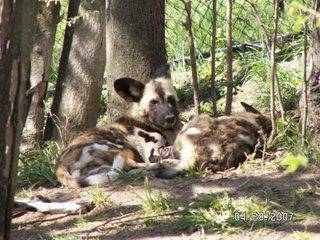

In [65]:
# convert image into numpy array
from matplotlib.pyplot import imread
image = imread(filename[50])
image

In [66]:
tf.constant(image)

<tf.Tensor: shape=(240, 320, 3), dtype=uint8, numpy=
array([[[176, 163, 146],
        [157, 144, 127],
        [148, 135, 118],
        ...,
        [109,  94,  97],
        [ 76,  60,  70],
        [ 75,  59,  70]],

       [[168, 155, 138],
        [148, 135, 118],
        [150, 137, 120],
        ...,
        [100,  86,  86],
        [ 64,  49,  56],
        [ 86,  70,  80]],

       [[149, 133, 117],
        [128, 112,  96],
        [144, 131, 114],
        ...,
        [108,  94,  93],
        [ 73,  57,  60],
        [ 67,  50,  56]],

       ...,

       [[ 92,  75,  65],
        [ 87,  70,  60],
        [ 76,  62,  53],
        ...,
        [253, 241, 217],
        [255, 241, 220],
        [255, 243, 222]],

       [[ 89,  72,  62],
        [ 86,  69,  59],
        [ 77,  63,  52],
        ...,
        [252, 241, 221],
        [251, 238, 221],
        [249, 236, 219]],

       [[ 85,  68,  58],
        [ 87,  70,  60],
        [ 83,  69,  58],
        ...,
        [255, 245, 22